In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#First inspect the data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# check last date  and use it to calculate the date a year prior to that date
last_date =  session.query(Measurement.date).order_by(Measurement.id.desc()).first()
print(last_date)

('2017-08-23',)


In [14]:
# create a last day object
last_datestr = last_date[0]
last_year= int(last_datestr.split("-")[0])
last_month= int(last_datestr.split("-")[1])
last_day= int(last_datestr.split("-")[2])

In [15]:
last_date= dt.date(last_year, last_month, last_day)
last_date

datetime.date(2017, 8, 23)

In [16]:
date_oneyear = dt.date(last_year, last_month, last_day) - dt.timedelta(days=365)
date_oneyear

datetime.date(2016, 8, 23)

In [17]:
# retrive the last 12 months from the last date 
# Perform a query to retrieve the date and precipitation scores
precp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(date_oneyear, last_date)).all()
precp_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precpdf= pd.DataFrame(precp_results, columns=['date','prcp'])
precpdf.set_index('date', inplace=True,)
precpdf.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [19]:
# Sort the dataframe by date
precpdf= precpdf.sort_values(by=["date"], ascending=True)
precpdf.head(2)

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN


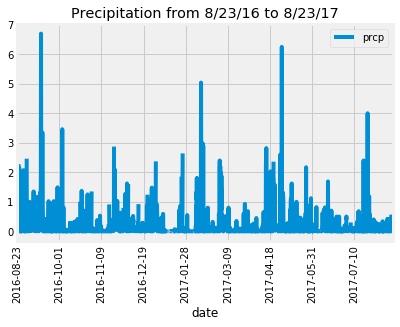

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
precpdf.plot(title="Precipitation from 8/23/16 to 8/23/17")
plt.tick_params(axis='x', which='both', length=0, rotation =90)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precpdf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
num_stations= session.query(Station.station).distinct().count()
print(f'The number of Stations is {num_stations}')

The number of Stations is 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stationcount = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())                  
stationcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
most_active = stationcount[0]
print (f'The most active station is {most_active[0]}')


The most active station is USC00519281


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temperatures = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active[0]).all()
temperatures
print (f'The hihest temp in {most_active[0]}   is   {temperatures[0][0]}Farenheit')
print (f'The lowest temp in {most_active[0]}   is   {temperatures[0][1]} Farenheit')
print (f'The average temp in {most_active[0]}   is  {round(temperatures[0][2],2)} Farenheit')



The hihest temp in USC00519281   is   54.0Farenheit
The lowest temp in USC00519281   is   85.0 Farenheit
The average temp in USC00519281   is  71.66 Farenheit


In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.between(date_oneyear, last_date)).filter(Measurement.station == most_active[0]).all()


In [27]:
tempdf= pd.DataFrame(temp_results, columns=['date','temp'])
# tempdf.set_index('date', inplace=True,)
tempdf.head(5)

,date,temp
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


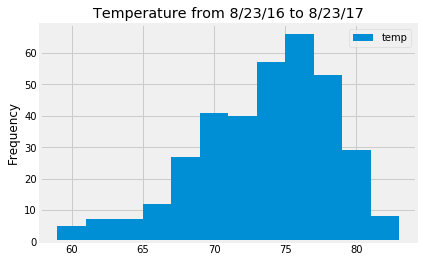

In [31]:
tempdf.plot(kind='hist', bins=12,title="Temperature from 8/23/16 to 8/23/17")

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates FROM 2017 .
# start date 2020-08-01 and finish date 2020-08-20
tempertrip = calc_temps('2017-08-01', '2017-08-20')
tempertrip


[(70.0, 78.675, 85.0)]

In [39]:
print (f'The lowest temp in previous year was {tempertrip[0][0]}  Farenheit')
print (f'The highest temp was {tempertrip[0][2]}  Farenheit')
print (f'The average temp was {tempertrip[0][1]}  Farenheit')


The lowest temp in previous year was 70.0  Farenheit
The highest temp was 85.0  Farenheit
The average temp was 78.675  Farenheit


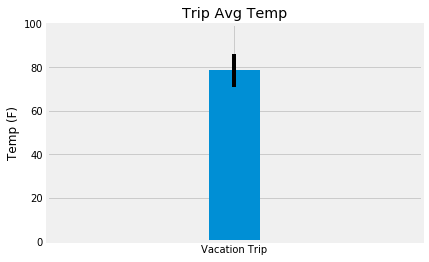

In [85]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avetempertrip=tempertrip[0][1]
maxtempertrip=tempertrip[0][2]
mintempertrip=tempertrip[0][0]
error = (maxtempertrip - mintempertrip)/2
x_label = 'Vacation Trip'
error
plot=plt.bar (x_label, avetempertrip,  width = 0.4, yerr= error )
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.show() 

In [112]:

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel=([Station.station,
      Station.name,
      func.sum(Measurement.prcp),
      Station.latitude,
      Station.longitude,
      Station.elevation])

rainfall = (session.query(*sel)
            .filter(Station.station == Measurement.station)
            .filter(Measurement.date.between('2017-08-01', '2017-08-20'))
            .group_by(Station.station)
            .order_by(func.sum(Measurement.prcp).desc())
            .all()) 

# stationcount = (session.query(Measurement.station, func.count(Measurement.station))
#                         .group_by(Measurement.station)
#                         .order_by(func.count(Measurement.station).desc())
#                         .all())    

rainfal_df= pd.DataFrame(rainfall,columns=['Station','Location', "total prec","Latitude", "Longitude", "Elevation"])
rainfal_df.head(10)

,Station,Location,total prec,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",2.34,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",0.57,21.45167,-157.84889,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.34,21.52130,-157.83740,7.0
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.26,21.33556,-157.71139,19.5
4,USC00519397,"WAIKIKI 717.2, HI US",0.06,21.27160,-157.81680,3.0


## Optional Challenge Assignment

In [114]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [120]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
startdate= '2017-08-01'
enddate= '2017-08-20'
startdate

'2017-08-01'

In [127]:
#Parse out the month and day

start_year= int(startdate.split("-")[0])
start_month= int(startdate.split("-")[1])
start_day= int(startdate.split("-")[2])
start_md= dt.date(start_year,start_month,start_day).strftime("%m-%d")

end_year= int(enddate.split("-")[0])
end_month= int(enddate.split("-")[1])
end_day= int(enddate.split("-")[2])
end_md= dt.date(end_year,end_month,end_day).strftime("%m-%d")

print (f'start of the trip (month-day)  {start_md}')
print (f'end month-day  {end_md}')
numdays= end_day - start_day
numdays

start of the trip (month-day)  08-01
end month-day  08-20


19

In [140]:
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
import datetime

dates=[]
date_md= dt.date(start_year,start_month,start_day).strftime("%m-%d")
dateloop_ini=dt.date(start_year,start_month,start_day)

for x in range (0,numdays+1):
    dateloop=dt.date(start_year,start_month,start_day)+datetime.timedelta(days=x)
    dateloop_md = dateloop.strftime("%m-%d")
    dates.append(dateloop_md)
print (dates)  



['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18', '08-19', '08-20']


'08-20'

In [169]:
# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normalstrip=[]

for x in dates:
    daily_normalstrip
    daily_normalsloop = daily_normals(x)
    daily_normalstrip.append(daily_normalsloop)
print (daily_normalstrip)




[[(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)], [(70.0, 76.61111111111111, 85.0)], [(69.0, 76.71153846153847, 84.0)], [(69.0, 76.14814814814815, 82.0)], [(67.0, 76.25, 83.0)], [(71.0, 77.15686274509804, 83.0)], [(68.0, 76.5576923076923, 83.0)], [(69.0, 75.98039215686275, 81.0)], [(65.0, 76.42, 83.0)], [(67.0, 75.98113207547169, 82.0)], [(67.0, 76.52727272727273, 83.0)], [(71.0, 76.98245614035088, 84.0)], [(71.0, 76.77777777777777, 82.0)], [(69.0, 76.47169811320755, 83.0)], [(69.0, 76.08, 83.0)], [(69.0, 76.125, 83.0)], [(70.0, 76.92307692307692, 84.0)], [(69.0, 75.94642857142857, 85.0)], [(68.0, 76.45283018867924, 82.0)]]


In [172]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dailystats_trip=[]   
for x in dates:
    daily={}
    daily['Date'] = x
    daily_nor = daily_normals(x)
    daily['Min'] = daily_nor[0][0]
    daily['Avg'] = round(daily_nor[0][1],2)
    daily['Max'] = daily_nor[0][2]
    dailystats_trip.append(daily)
    
dayly_tripdf= pd.DataFrame(dailystats_trip)
dayly_tripdf.set_index('Date', inplace = True)
dayly_tripdf   

,Avg,Max,Min
Date,,,
08-01,75.54,83.0,67.0
08-02,75.60,84.0,68.0
08-03,76.61,85.0,70.0
08-04,76.71,84.0,69.0
08-05,76.15,82.0,69.0
08-06,76.25,83.0,67.0
08-07,77.16,83.0,71.0
08-08,76.56,83.0,68.0
08-09,75.98,81.0,69.0


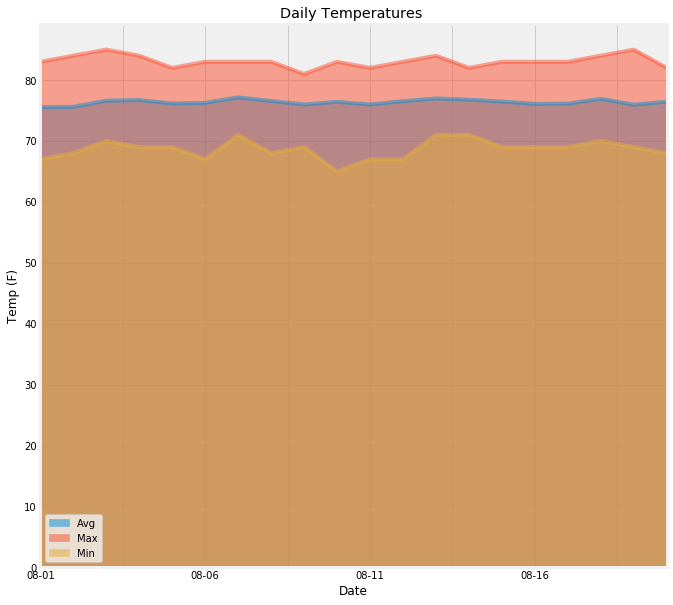

In [168]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (10, 10))
dayly_tripdf.plot.area(ax = ax, stacked = False)

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temp (F)')
ax.set_title('Daily Temperatures ')

#save figure
plt.savefig('Images/daily_temp_trip.png')

plt.show()